In [78]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [79]:
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
!ls drive/MyDrive/영어음운론


yourgoodpants.csv	    yourgoodpants_formants.gsheet
yourgoodpants_formants.csv  yourgoodpants_intensity.csv


load csv


In [133]:
df_pitch = pd.read_csv("drive/MyDrive/영어음운론/yourgoodpants.csv", sep=',')
df_intensity = pd.read_csv("drive/MyDrive/영어음운론/yourgoodpants_intensity.csv", sep=',')
df_frequency = pd.read_csv("drive/MyDrive/영어음운론/yourgoodpants_formants.csv", sep=',')


Check info

In [140]:
df_pitch.info()
df_intensity.info()
df_frequency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Word    202 non-null    object
 1   Time_s  202 non-null    object
 2   F0_Hz   202 non-null    object
dtypes: object(3)
memory usage: 4.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Word          175 non-null    object 
 1   Time_s        175 non-null    float64
 2   Intensity_dB  175 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Word    374 non-null    object 
 1   Time_s  374 non-null    float64
 2   F1_Hz   374 non-null    float64
 3   F2_Hz   374

Redefine --undefined-- to None

In [142]:
df_pitch.loc[df_pitch.Time_s == "--undefined--", "Time_s"] = None
df_pitch.loc[df_pitch.F0_Hz == "--undefined--", "F0_Hz"] = None
df_frequency.loc[df_frequency.F4_Hz == "--undefined--", "F4_Hz"] = None


Change type of F4_Hz (object) to float

In [143]:
df_frequency["F4_Hz"] = df_frequency["F4_Hz"].astype(float, errors = 'raise')

Check the changes

In [127]:
print(df_pitch)
print(df_frequency.F4_Hz[104])

      Word    Time_s       F0_Hz
0     your      None        None
1     your  1.085014  117.280696
2     your  1.096552  122.263492
3     your  1.108091  121.140303
4     your  1.119629  122.770577
..     ...       ...         ...
197  great  3.346552   95.178345
198  great  3.358091   83.729897
199  great  3.369629   82.816288
200  great  3.381168   91.967714
201  great  3.392706   92.016121

[202 rows x 3 columns]
None


Pitch

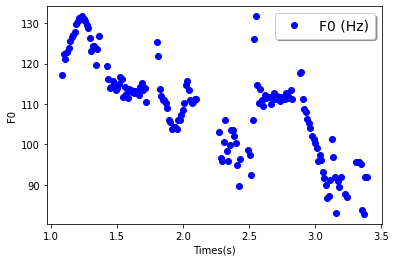

In [119]:
time_pitch = df_pitch.Time_s
f0 = df_pitch.F0_Hz

plt.plot(time_pitch, f0, 'bo', label='F0 (Hz)')
plt.xlabel('Times(s)')
plt.ylabel('F0')
plt.legend(loc='best', ncol=2, fontsize=14, frameon=True, shadow=True)
plt.show()

Intensity

0      66.051953
1      66.846919
2      66.634770
3      67.944181
4      70.293201
         ...    
170    53.314435
171    52.618285
172    53.862755
173    56.574866
174    58.442746
Name: Intensity_dB, Length: 175, dtype: float64


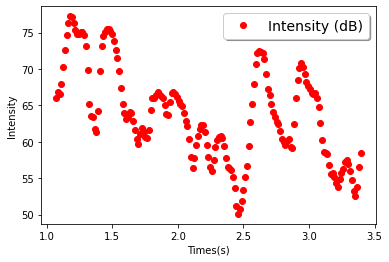

In [123]:
time_intensity = df_intensity.Time_s
intensity = df_intensity.Intensity_dB

plt.figure()
plt.plot(time_intensity, intensity, 'ro', label='Intensity (dB)')
plt.xlabel('Times(s)')
plt.ylabel('Intensity')
plt.legend(loc='best', ncol=2, fontsize=14, frameon=True, shadow=True)

Frequency

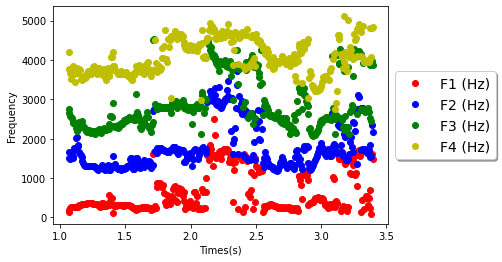

In [147]:
time_frequency = df_frequency.Time_s
f1 = df_frequency.F1_Hz
f2 = df_frequency.F2_Hz
f3 = df_frequency.F3_Hz
f4 = df_frequency.F4_Hz

plt.figure()
plt.plot(time_frequency, f1, 'ro', label='F1 (Hz)')
plt.plot(time_frequency, f2, 'bo', label='F2 (Hz)')
plt.plot(time_frequency, f3, 'go', label='F3 (Hz)')
plt.plot(time_frequency, f4, 'yo', label='F4 (Hz)')

plt.xlabel('Times(s)')
plt.ylabel('Frequency')
plt.legend(loc='center left', ncol=1, fontsize=14, frameon=True, shadow=True, bbox_to_anchor=(1.0, 0.5))